# Pytorch
- python 기반의 과학 계산을 위한 package
- numpy 연산을 gpu 가속을 사용할 수 있음
- 유연하고 빠름

## Tensor
> pytorch의 자료형

- 단일 데이터 타입으로 된 자료들의 다차원 행렬
- 간단한 명령어를 통해 GPU 연산 수행 가능
    - Tensor 변수 뒤에 .cuda()를 추가하면 가능
- 그냥 Tensor로 선언하면 자동으로 FloatTensor


### Tensor의 선언
- torch.Tensor(크기)

In [2]:
import torch
x = torch.Tensor(3)
print(x)

tensor([0.0000e+00, 0.0000e+00, 9.0564e+33])


In [6]:
x2 = torch.Tensor(3,3)
print(x2)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


### Tensor의 random 선언

- `rand`를 통한 0~1 사이의 uniiform distribution random 값으로 선언
- `randn`을 통해 평균이 0이고 분산이 1인 normal distribution random 값으로 선언

In [8]:
a = torch.rand(3,3)
print(a)

tensor([[0.5407, 0.6855, 0.0890],
        [0.1631, 0.8402, 0.8241],
        [0.2190, 0.7920, 0.2552]])


In [9]:
a = torch.randn(3,3)
print(a)

tensor([[ 0.8629, -0.3507, -0.1826],
        [-0.4211, -2.4101,  0.4162],
        [-1.0219,  0.4365,  1.0153]])


### Numpy 에서 Tensor로

In [15]:
import numpy as np 
a = np.array([1,2,3,4])
b = torch.Tensor(a)
print(f'np : {a}, {type(a)}')
print(f'tensor : {b}, {type(b)}')

np : [1 2 3 4], <class 'numpy.ndarray'>
tensor : tensor([1., 2., 3., 4.]), <class 'torch.Tensor'>


### Tensor 에서 Numpy로

In [17]:
a = torch.randn(3,3)
b = a.numpy()
print(f'tensor : {a, type(a)}')
print(f'np : {b}, {type(b)}')

tensor : (tensor([[ 1.1500, -0.0283, -0.0091],
        [-0.7569, -0.8772, -0.2132],
        [-0.9550, -0.6174, -0.3981]]), <class 'torch.Tensor'>)
np : [[ 1.1499712  -0.02829299 -0.00906428]
 [-0.75686234 -0.8772122  -0.21318877]
 [-0.9550173  -0.6173842  -0.3980513 ]], <class 'numpy.ndarray'>


### Tensor의 형태 변환(view)

In [18]:
a = torch.rand(3,3)
a = a.view(1,1,3,3)
print(a.shape)

torch.Size([1, 1, 3, 3])


### Tensor 합치기
- torch.cat((Tensor_A, Tensor_B), dim)
- Tensor_A 와 Tensor_B를 dim에 맞춰서 합쳐 줌

In [20]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b), 0)
print(c.shape)

torch.Size([2, 1, 3, 3])


### Tensor 계산을 GPU로

In [21]:
x = torch.rand(3,3)
y = torch.rand(3,3)
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    sum = x + y
print(sum)

tensor([[1.9126, 0.9794, 1.5866],
        [1.0962, 1.9305, 1.6977],
        [0.5296, 0.7542, 1.0974]], device='cuda:0')


# Autograd & Variable

## Autograd : automatic differentiation 
- backprop을 위한 미분 값을 자동으로 계산해줌
- 자동 계산을 위해서 사용하는 변수는 torch.autograd에 있는 Variable

### Variable의 모습
- data : Tensor형태의 데이터가 담김
- grad : data가 거쳐운 layer에 대한 미분값이 축적됨
- gradn_fn : 미분 값을 계산한 함수에 대한 정보

In [25]:
from torch.autograd import Variable
a = torch.rand(5)
a = Variable(a)

In [26]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


### requires_grad = True
- gradient 값이 필요하다는 것을 인자로 명시
- default는 False

In [27]:
a = Variable(a, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


### 아무런 연산 진행하지 않았기 때문에 grad, grad_fn이 None인 것을 확인할 수 있음

In [28]:
print('----a.data----')
print(a.data)
print('----a.grad----')
print(a.grad)
print('----a.grad_fn----')
print(a.grad_fn)

----a.data----
tensor([[1., 1.],
        [1., 1.]])
----a.grad----
None
----a.grad_fn----
None


In [30]:
b = a+2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [31]:
c = b**2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [32]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


### bacward()
- a -> b -> c -> out
    - out에 대한 a의 편미분을 통한 값이 담기는 장소는 a.grad
    - out.backward를 수행하고나면 grad부분이 채워짐

In [37]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


#### a.gard_fn이 None인 이유는 a가 직접적으로 수행을하는 연산이 없기 때문에 gradient를 계산하는 함수가 없을 수 밖에 없음

In [38]:
print('----a.data----')
print(a.data)
print('----a.grad----')
print(a.grad)
print('----a.grad_fn----')
print(a.grad_fn)

----a.data----
tensor([[1., 1.],
        [1., 1.]])
----a.grad----
tensor([[6., 6.],
        [6., 6.]])
----a.grad_fn----
None


#### gradient가 필요하지 않기 때문에 b.grad는 None
- b = a + 2 add 연산에 대한 back ward

In [39]:
print('----b.data----')
print(b.data)
print('----b.grad----')
print(b.grad)
print('----b.grad_fn----')
print(b.grad_fn)

----b.data----
tensor([[3., 3.],
        [3., 3.]])
----b.grad----
None
----b.grad_fn----


#### c = b^2
- powerbackward

In [41]:
print('----c.data----')
print(c.data)
print('----c.grad----')
print(c.grad)
print('----c.grad_fn----')
print(c.grad_fn)

----c.data----
tensor([[9., 9.],
        [9., 9.]])
----c.grad----
None
----c.grad_fn----


#### out = c + sum

In [42]:
print('----out.data----')
print(out.data)
print('----out.grad----')
print(out.grad)
print('----v.grad_fn----')
print(out.grad_fn)

----out.data----
tensor(36.)
----out.grad----
None
----v.grad_fn----


#### backward의 인자로 tensor를 넣어주면 (크기를 맞췄을 때) backward된느 값에 각각 곱해져서 채워지게 됨

In [46]:
x = torch.ones(3)
x = Variable(x, requires_grad=True)
y = (x**2)
z = y*3
print(z)
grad = torch.Tensor([0.1, 1, 10])
z.backward(grad)

tensor([3., 3., 3.], grad_fn=<MulBackward0>)


In [47]:
print('----x.data----')
print(x.data)
print('----x.grad----')
print(x.grad)
print('----x.grad_fn----')
print(x.grad_fn)

----x.data----
tensor([1., 1., 1.])
----x.grad----
tensor([ 0.6000,  6.0000, 60.0000])
----x.grad_fn----
None


# nn & nn.functional
- nn이나 nn.functional이 제공하는 기능이 유사한데 사용하는 방식의 차이가 약간 있음

In [48]:
import torch.nn as nn
import torch.nn.functional as F

## conv2d를 통한 비교
- nn.Conv2d(input 채널, output 채널(필터 개수)...)
    - weight값을 직접 설정해주지 않음
        - weight를 자동으로 설정해줌
- nn.functional.conv2d(input 채널, weight...)

### nn.functional.Conv2d

In [49]:
input = torch.ones(1,1,3,3)
filter = torch.ones(1,1,3,3)

input = Variable(input, requires_grad = True)
print(input)

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]], requires_grad=True)


In [50]:
filter = Variable(filter)
out = F.conv2d(input, filter)

In [51]:
print(out)

tensor([[[[9.]]]], grad_fn=<ThnnConv2DBackward>)


In [52]:
out.backward()

In [53]:
print(out.grad_fn)

In [54]:
print(input.grad)

tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]]])


- filter + 1

In [55]:
input = Variable(torch.ones(1,1,3,3), requires_grad = True)
filter = filter + 1

In [56]:
out = F.conv2d(input, filter)
print(out)
out.backward()
print(out.grad_fn)
print('----input.grad----')
print(input.grad)

tensor([[[[18.]]]], grad_fn=<ThnnConv2DBackward>)
----input.grad----
tensor([[[[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]])


### nn.Conv2d

In [58]:
input = torch.ones(1,1,3,3)
input = Variable(input, requires_grad = True)
# input 채널, output 채널, 커널 사이즈(3 x 3)
func = nn.Conv2d(1,1,3)

In [59]:
func.weight

Parameter containing:
tensor([[[[ 0.3129,  0.3183, -0.0531],
          [ 0.1749,  0.0574, -0.0492],
          [ 0.2198,  0.2524, -0.2807]]]], requires_grad=True)

In [60]:
out = func(input)
print(out)

tensor([[[[1.0461]]]], grad_fn=<ThnnConv2DBackward>)


In [61]:
print(input.grad)

None


In [62]:
out.backward()

In [63]:
print(input.grad)

tensor([[[[ 0.3129,  0.3183, -0.0531],
          [ 0.1749,  0.0574, -0.0492],
          [ 0.2198,  0.2524, -0.2807]]]])


### 5x5 에 3x3 filter conv

In [65]:
input = torch.ones(1,1,5,5)
input = Variable(input, requires_grad=True)

filter = nn.Conv2d(1,1,3,bias=None)
print(filter.weight)

Parameter containing:
tensor([[[[ 0.2651,  0.2781, -0.2381],
          [-0.0356, -0.1803,  0.2359],
          [-0.1297,  0.2174, -0.2726]]]], requires_grad=True)


- 직접 weight 설정

In [66]:
filter.weight = torch.nn.Parameter(torch.ones(1,1,3,3) + 1)

In [68]:
filter.weight

Parameter containing:
tensor([[[[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]], requires_grad=True)

In [69]:
out = filter(input)

In [75]:
print(out)

tensor([[[[18., 18., 18.],
          [18., 18., 18.],
          [18., 18., 18.]]]], grad_fn=<ThnnConv2DBackward>)


In [86]:
out = out.sum()

In [87]:
out.backward()

In [88]:
print(input.grad)

tensor([[[[ 2.,  4.,  6.,  4.,  2.],
          [ 4.,  8., 12.,  8.,  4.],
          [ 6., 12., 18., 12.,  6.],
          [ 4.,  8., 12.,  8.,  4.],
          [ 2.,  4.,  6.,  4.,  2.]]]])


In [97]:
input

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]], requires_grad=True)

In [91]:
filter.weight

Parameter containing:
tensor([[[[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]], requires_grad=True)

In [89]:
input.data

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])

### ReLU, sigmoid, tanh, Max Pooling

In [77]:
act_input = Variable(torch.randn(1,1,3,3))
print(act_input)

act = F.relu(act_input)
print(act)

tensor([[[[ 0.2947,  1.3136,  0.2224],
          [-0.5110, -0.1759,  0.1465],
          [ 1.0200, -0.1743,  1.1107]]]])
tensor([[[[0.2947, 1.3136, 0.2224],
          [0.0000, 0.0000, 0.1465],
          [1.0200, 0.0000, 1.1107]]]])


In [78]:
m = nn.MaxPool2d(2, stride=1)
m_out = m(act)

print(m_out)

tensor([[[[1.3136, 1.3136],
          [1.0200, 1.1107]]]])


In [79]:
act2 = F.sigmoid(m_out)
print(act2)

tensor([[[[0.7881, 0.7881],
          [0.7350, 0.7523]]]])


C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [80]:
act3 = F.tanh(m_out)
print(act3)

tensor([[[[0.8652, 0.8652],
          [0.7699, 0.8043]]]])


C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [81]:
avg = nn.AvgPool2d(2, stride=1)
avg_out = avg(act3)
print(avg_out)

tensor([[[[0.8261]]]])


## Define the Network
- Class 선언으로 사용하고자 하는 Network를 직접 구현
- Class로 선언할 Network에 필수 요소
- def __init__(self):
- def forward(self, x):

In [92]:
avg = nn.AvgPool2d(2, stride=1)
avg_out = avg(act3)
print(avg_out)

tensor([[[[0.8261]]]])


In [95]:
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.Max_pool = nn.MaxPool2d(2, stride=1)
        self.Avg_pool = nn.AvgPool2d(2, stride=1)
    def forward(self, x):
        x = F.relu(x)
        x = self.Max_pool(x)
        x = F.tanh(x)
        x = self.Avg_pool(x)
        return x

In [96]:
out = model()
out(act_input)

C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torch\nn\functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([[[[0.8261]]]])

__정리__
- Pytorch에서 연산을 위한 변수는 모두 Tensor로 선언되어 있어야 함
- Autograd 기능을 이용하면 Backprop을 자동으로 수행시킬 수 있음
- 그를 위해서는 Backprop 계산을 해야하는 Tensor 형태의 변수를 Variable로 감싸야 함
- Pytorch에서 제공하는 nn과 nn.functional을 이용하면 Neural Network위한 함수를 쉽게 사용할 수 있음
- nn과 nn.functional의 차이를 알고 쓰는 것이 좋음


# Data Loader & make NN

## DataLoader(input value setting)
- 입력은 어떻게 정의하는지
- batch나 epoch은 어떻게
- 선처리를 어떻게 할 수 있는지
- mnist, cifar-10같은 공용 데이터 셋말고 자신의 데이터를 넣고 싶을 때

In [100]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
import torchvision.transforms as transforms

### transforms
- 선처리를 위한 함수
- Compose를 통해 선처리를 여러개 진행할때 모아주는 역할

In [64]:
# transforms.ToTensor() : numpy에서 tensor로 바꿔주고 채널의 변화를 가지고온다
# transforms.Normalize() : 정규화 
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [65]:
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [66]:
# 이미지를 가지고오는 연산은 cpu에서 처리 cpu 프로세스를 몇개 사용하냐를 : num_woworkers로 
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

In [135]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [136]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    # 선처리 부분의 ToTensor에서 H x W x C 를 C x H x W 로 바꿨었기 때문에 다시 원래대로 바꿔줌
    # 0 1 2 를 1 2 0 으로
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img, (1,2,0))).shape)

In [137]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [109]:
for n, (img, labels) in enumerate(trainloader):
    if n % 1000 == 0:
        print(n, img.shape, labels.shape)

0 torch.Size([8, 3, 32, 32]) torch.Size([8])
1000 torch.Size([8, 3, 32, 32]) torch.Size([8])
2000 torch.Size([8, 3, 32, 32]) torch.Size([8])
3000 torch.Size([8, 3, 32, 32]) torch.Size([8])
4000 torch.Size([8, 3, 32, 32]) torch.Size([8])
5000 torch.Size([8, 3, 32, 32]) torch.Size([8])
6000 torch.Size([8, 3, 32, 32]) torch.Size([8])


torch.Size([8, 3, 32, 32])
(3, 70, 138)
(70, 138, 3)
torch.Size([8, 3, 32, 32])
torch.Size([3, 36, 274])
 ship   car horse  deer   car   dog plane   car 


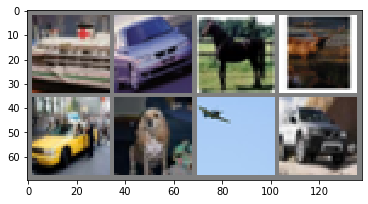

In [139]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s ' %classes[labels[j]] for j in range(8)))

### 자신의 데이터 셋을 넣는 방법
- 폴더 구조 유의

In [9]:
trans = transforms.Compose([transforms.Resize((100,100)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.ImageFolder(root='./data/shiba', transform=trans)

In [10]:
len(trainset)

2

In [11]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([2, 3, 100, 100])
(3, 104, 206)
(104, 206, 3)
torch.Size([2, 3, 100, 100])
torch.Size([3, 104, 206])
tensor(0) tensor(1) 


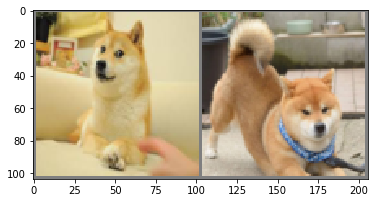

In [131]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s ' %labels[j] for j in range(2)))

## Define the Network
```python
    class my_network(nn.Module):
        def __init__(self):
            super(my_entwork, self).__init__()
            (사용할 함수들을 정의할 장소)

        # input이 여러개면 x,y,z,...
        def forward(self, x):
            (함수들을 사용하여 Network의 forward를 정의하는 장소)
```
    

In [140]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([8])


In [141]:
net = nn.Conv2d(3,5,5)

In [142]:
out1 = net(Variable(imgs))
print(out1.shape)

torch.Size([8, 5, 28, 28])


In [143]:
net2 = nn.Conv2d(5,10,5)

In [144]:
out2 = net2(out1)
print(out2.shape)

torch.Size([8, 10, 24, 24])


__network를 class로 만들어 사용__

In [145]:
class my_network(nn.Module):
    def __init__(self):
        super(my_network, self).__init__()
        self.net_1 = nn.Conv2d(3,5,5)
        self.net_2 = nn.Conv2d(5,10,5)
    def forward(self, x):
        x = self.net_1(x)
        x = self.net_2(x)
        return x

In [146]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([8])


In [147]:
my_net = my_network()

In [148]:
out = my_net(Variable(imgs))
print(out.shape)

torch.Size([8, 10, 24, 24])


# Optim & Criterion
- forward 출력으로 loss를 구하고 torch.optim을 통해 update

## Loss는 어디서 생기는지
- input, output, label
- y = Wx + b
- d - y가 0이길 희망
- Error(=Loss)는 어떻게 계산하는지
    - Regression(회귀)
        - 출력층에 쓰이는 활성화 함수(항등사항= 나오는대로 쓴다)
        - Error Function : 제곱오차
    - 이진분류(Binary Classification)
        - 출력층에 쓰이는 함수(Logistic Function)
        - Error Function : BCELoss
    - 다 클래스 분류(Multi class Classification)
        - 출력층에 쓰이는 함수(Softmax function)
        - Error Function : CrossEntropy


__요약__
1. import torch, torch.nn, torchvision, torch
2. Dataset 만들기 - torchvision, torch.utils.data.Dataset
3. Model 만들기 - class Mynetwork(nn.Module)
4. Optim과 loss계산 함수 결정
5. 학습을 위한 반복문 작성
6. 평가 및 모델 저장

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
import torchvision.transforms as transforms

In [71]:
class my_network(nn.Module):
    def __init__(self):
        super(my_network, self).__init__()
        self.conv1 = nn.Conv2d(3,64,5)
        self.conv2 = nn.Conv2d(64,30,5)
        self.fc1 = nn.Linear(30*5*5,128)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x), inplace=True)
        x = F.max_pool2d(x, (2,2))
        x = F.relu(self.conv2(x), inplace=True)
        x = F.max_pool2d(x, (2,2))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x), inplace=True)
        x = F.relu(self.fc2(x), inplace=True)
        
        return x

In [72]:
my_net = my_network()

In [73]:
optim = torch.optim.SGD(Net.parameters(), lr=0.01, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

In [75]:
epoch_num = 1
for epoch in range(epoch_num):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        # network가 가지고 있는 각 파라미터는 본인의 gradient를 갖고있는데 0으로 초기화 시켜줌
        optim.zero_grad()
        out = my_net(inputs)
        # out과 label을 넣어주면 loss를 계산해줌
        loss = loss_function(out, labels)
        # loss의 backward를 통해 자동으로 파라미터들이 gradient값을 갖게되고
        loss.backward()
        # 그 값을 가지고 weight를 업데이트 해줌 
        optim.step()
        
        if i % 64 == 0:
            print(f'{i} = > loss : {loss}')
print('train over')

0 = > loss : 2.295288324356079
64 = > loss : 2.2778372764587402
128 = > loss : 2.3005449771881104
192 = > loss : 2.3072192668914795
256 = > loss : 2.3083341121673584
320 = > loss : 2.279324769973755
384 = > loss : 2.2876152992248535
448 = > loss : 2.3202266693115234
512 = > loss : 2.2992186546325684
576 = > loss : 2.31765079498291
640 = > loss : 2.3120040893554688
704 = > loss : 2.30134916305542
768 = > loss : 2.2847769260406494
832 = > loss : 2.3222248554229736
896 = > loss : 2.2886314392089844
960 = > loss : 2.319136381149292
1024 = > loss : 2.3085315227508545
1088 = > loss : 2.3077101707458496
1152 = > loss : 2.309800624847412
1216 = > loss : 2.3151540756225586
1280 = > loss : 2.2940940856933594
1344 = > loss : 2.285729169845581
1408 = > loss : 2.2985587120056152
1472 = > loss : 2.3045883178710938
1536 = > loss : 2.3258848190307617
1600 = > loss : 2.299806833267212
1664 = > loss : 2.3164663314819336
1728 = > loss : 2.3105015754699707
1792 = > loss : 2.3171937465667725
1856 = > loss 

## 평가

In [77]:
total = 0
correct = 0
for data in testloader:
    images, labels = data
    outputs = my_net(Variable(images))
    # outputs.data 에대해 ndim = 1을 기준으로 max index를 찾음
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print(f'Accuracy : {100*correct/total}')

Accuracy : 10


# Custom Dataset

In [78]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
from torch.utils.data import DataLoader, Dataset
import PIL.Image as Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [79]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [80]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testlader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

## dataset의 형태는 이렇게 만들어줘야 함

```python
class my_dataset(torch.utils.data.Dataset):
    def __init__(self, x, transforms=None):
        [ 데이터 셋을 가져와서 선처리를 해준다 ]
    def __len__(self):
        [ 데이터 셋의 길이를 적어줌 ]
    def __getitem__(self, idx):
        [ 데이터 셋에서 한 개의 데이터를 가져오는 함수를 정의 ]
```

- CIFAR-10, COCO, folder, MNIST들 모두 init, len, getitem의 구조를 갖는 class

### Custom Dataset 구성방법
- class를 만들고 인자로 torch.utils.data.Dataset을 넣어줌
- 3가지 함수(init, len, getitem)을 만들어줌

# Network 쉽게만들기 & 저장, 불러오기
- model 저장하고 불러오기

In [84]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import visdom
import torchvision
from torch.utils.data import DataLoader, Dataset
import PIL.Image as Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [85]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

Files already downloaded and verified
Files already downloaded and verified


- layer 형태로 쉽게 network build

In [90]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,32,5),
            nn.ReLU(inplace=True),
            nn.Conv2d(32,64,3),
            nn.ReLU(inplace=True),
            nn.Conv2d(64,128,3),
            nn.Conv2d(128,128,3),
            nn.ReLU(inplace=True),
            nn.Conv2d(128,256,3),
            nn.MaxPool2d(2)
        )        
        self.layer2_1 = nn.Sequential(
            nn.Conv2d(256,512,7,1,2),
            nn.Conv2d(512,64,1),
            nn.MaxPool2d(2)
        )        
        self.layer2_2 = nn.Sequential(
            nn.Conv2d(256,512,5,1,1),
            nn.Conv2d(512,64,1),
            nn.MaxPool2d(2)
        )        
        self.layer2_3 = nn.Sequential(
            nn.Conv2d(256,512,3),
            nn.Conv2d(512,64,1),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(3*64*4*4, 1024),
            nn.ReLU(True),
            nn.Linear(1024,10)
        )
        
    def forward(self, x):
        print(x.data.shape)
        x = self.layer1(x)
        x1 = self.layer2_1(x)
        x2 = self.layer2_2(x)
        x3 = self.layer2_3(x)
        x = torch.cat((x1,x2,x3),1)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [87]:
a = torch.rand(1,3,32,32)
print(a.shape)
a = Variable(a)
print(a.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 3, 32, 32])


In [92]:
network = Net()
out = network(a)
print(out.shape)

torch.Size([1, 3, 32, 32])
torch.Size([1, 10])


In [93]:
print(out)

tensor([[ 0.0153, -0.0097,  0.0258, -0.0428,  0.0169,  0.0074,  0.0365,  0.0247,
          0.0269, -0.0490]], grad_fn=<AddmmBackward>)


## network save
- torch.save(위치, 파일이름)
- 같은 아키텍쳐 model인스턴스를 만들고 . load_state_dict(torch.load(경로 + 파일이름))

In [94]:
torch.save(network.state_dict(), './cnn.pth')

In [95]:
model = Net()
model.load_state_dict(torch.load('./cnn.pth'))

<All keys matched successfully>

In [97]:
out = model(a)
# 결과 값이 위의 값과 일치하는 것을 통해 save한 모델을 load해서 쓰는 것을 알 수 있음
print(out)

torch.Size([1, 3, 32, 32])
tensor([[ 0.0153, -0.0097,  0.0258, -0.0428,  0.0169,  0.0074,  0.0365,  0.0247,
          0.0269, -0.0490]], grad_fn=<AddmmBackward>)


# Visdom
- 프롬프트에서 `python -m visdom.server`

In [99]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import visdom

In [100]:
vis = visdom.Visdom()

textwindow = vis.text("Hello Pytorch")

In [101]:
import torchvision
import torchvision.transforms as transforms

In [102]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data',
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.MNIST(root='./data',
                                       train=False,
                                       download=True,
                                       transform=transform)

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


113.5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


100.4%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


180.4%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


In [103]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [ ]:
iter(trainloader)()

In [104]:
for i,data in enumerate(trainloader):
    img, label = data
    vis.image(img[0])
    vis.images(img)
    break

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torch\utils\data\_utils\worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torch\utils\data\_utils\fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torchvision\datasets\mnist.py", line 95, in __getitem__
    img = self.transform(img)
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torchvision\transforms\transforms.py", line 61, in __call__
    img = t(img)
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torchvision\transforms\transforms.py", line 166, in __call__
    return F.normalize(tensor, self.mean, self.std, self.inplace)
  File "C:\Users\ultra\Anaconda3\envs\pytorch_env\lib\site-packages\torchvision\transforms\functional.py", line 217, in normalize
    tensor.sub_(mean[:, None, None]).div_(std[:, None, None])
RuntimeError: output with shape [1, 28, 28] doesn't match the broadcast shape [3, 28, 28]


# 예제로 배우는 pytorch
- https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html

> 본질적으로 pytorch에는 2가지 주요한 특징이 있음

- numpy와 유사하지만 GPU 상에서 실행 가능한 N차원 Tensor
- 신경망을 구성하고 학습하는 과정에서의 자동미분

## numpy를 사용하여 신경망 구성
- numpy는 과학적 분야의 연산을 위한 포괄적인 프레임워크
- numpy는 연산 그래프나 딥러닝, 변화도에 대해서는 알지 못하지만, numpy연산을 사용하여 순전파,역전파 단계를 직접 구현함으로써, 2계층을 갖는 신경망이 무작위 데이터를 맞추도록 할 수 있음

In [9]:
import numpy as np

# N : batch_size
# D_in : input dimension
# H : hidden dimension
# D_out : output dimension
N, D_in, H, D_out = 64, 1000, 100, 10

# 무작위 입력과 출력 데이터 생성
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape, y.shape)

# 무작위로 가중치 초기화
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape, w2.shape)

learning_rate = 1e-6
for t in range(500):
    # 순전파
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # loss 계산
    loss = np.square(y_pred - y).sum()
    
    # 손실 차로 w1, w2 변화도 계산하고 역전파
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # 가중치 갱신
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
    if t % 100 == 0:
        print(f'{t}번째loss : {loss}')

(64, 1000) (64, 10)
(1000, 100) (100, 10)
0번째loss : 25574509.579905637
100번째loss : 223.6268874296327
200번째loss : 0.6113971678913223
300번째loss : 0.0030979775354945524
400번째loss : 2.003280285395585e-05


## Pytorch : Tensors
- numpy는 훌륭한 프레임워크지만 GPU를 사용하여 수치연산을 가속화할 수는 없음
- Pytorch Tensors는 개념적으로 Numpy 배열과 동일
    - Tensor는 N차원 배열
    - Pytorch는 Tensor 연산을 위한 다양한 함수들을 제공
    - Numpy 배열처럼 Pytorch Tensor는 딥러닝이나 연산그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구
- 그러나 Numpy와는 달리 GPU를 활용하여 수치 연산을 가속화할 수 있음
    - GPU에서 Pytorch Tensor를 실행하기 위해서는 단지 새로운 자료형으로 변환해주기만 하면 됨
 

In [17]:
test.shape

torch.Size([1, 2, 3, 4])

In [30]:
test.view(1,-1).t().shape

torch.Size([24, 1])

In [25]:
test.t()

RuntimeError: t() expects a tensor with <= 2 dimensions, but self is 4D

In [32]:
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU 환경

N, D_in, H, D_out = 64, 1000, 100, 10

# 무작위 입력과 출력 데이터 생성
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# 무작위로 가중치를 초기화
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6

for t in range(500):
    # 순전파 단계
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    
    # loss 계산
    loss = (y_pred - y).pow(2).sum().item()
    
    # 손실에 따른 w1, w2구하고 역전파
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # 가중치 갱신
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    if t % 100 == 0:
        print(f'{t}번째 loss : {loss}')

0번째 loss : 30707056.0
100번째 loss : 747.1109619140625
200번째 loss : 6.620823860168457
300번째 loss : 0.09195300936698914
400번째 loss : 0.001859804498963058


## Autograd
- 역전파 단계의 gradeint를 직접 수식으로 구현했었는데, 자동 미분(Aotugrad)을 사용하여 역전파 단계의 연산을 자동화할 수 있음
- Autograd를 사용할 때, 신경망의 순전파 단계는 연산 그래프를 정의하게 됨
    - 그래프의 node는 Tensor
    - 엣지는 입력 Tensor로 부터 출력 Tensor를 만들어내는 함수
    - 그래프를 통해 역전파를 하게 되면 변화도를 쉽게 계산할 수 있음
- 각 Tensor는 연산 그래프에서 노드로 표현되는데, `x.requires_grad = True`인 Tensor면 `x.grad`는 어떤 스칼라 값에 대한 x의 변화도를 갖는 또 다른 Tensor

In [ ]:
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")

N, D_in, H, D_out = 64, 1000, 100, 10

# 입력과 출력을 저장하기 위한 무작위 값을 갖는 Tensor를 생성
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtpye=dtype)

# 가중치 저장
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad = True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad = True)

learning_rate = 1e-6

for t in range(500):
    # Autograd 통해 자동화된 연산 가능
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # loss는 (1,) 형태의 Tensor이며, loss.item()은 loss의 스칼라 값
    loss = (y_pred - y).pow(2).sum()
    
    # autograd를 사용하여 역전파 단계를 계산
    loss.backward()
    
    # gradient descent를 사용하여 가중치를 수동으로 갱신